In [133]:
import requests
import pandas as pd
import geopandas as gpd
import math
from datetime import date
import datetime
import time


### Querying data from https://docs.openaq.org/docs/getting-started

In [252]:
def get_sensor_locations_in_canada( country_code = "CA", parameter = "pm25", limit = 1000):
  # ISO 3166-1 alpha-2 country code for Montenegro

    if(limit != 1000):
        print("Warning, it's possible that this function only works with max limit 1000, and behaves weirdly otherwise")
        
    #url = f"https://api.openaq.org/v2/locations?country={country_code}&parameter={parameter}&limit=1000"#&offset=1000"
    url = f"https://api.openaq.org/v2/locations?country={country_code}&parameters_id=2&limit=1000"#&offset=1000"

    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers)
    if(response.status_code != 200):
        print(response.text)

    resj = response.json()
    
    foo = pd.DataFrame(resj['results'])
    tot_pages = resj['meta']['found']
    print(tot_pages)
    div = tot_pages/limit
    pages = math.ceil(div)
    
    #list_of_locations = pd.DataFrame(test['results'])
    #tmp_frame = pd.DataFrame(test['results'])
    
    #list_of_locations = []
    
    df_raw = pd.DataFrame()
    
    for i in range(1, (pages+2)):
        print(i)
        url = f"https://api.openaq.org/v2/locations?country={country_code}&parameter={parameter}&limit={limit}&page={i}"
        response2 = requests.get(url, headers=headers)
        test = response2.json()
        tmp_frame = pd.DataFrame(test['results'])
        #print(tmp_frame)
        df_raw = pd.concat([ df_raw,  tmp_frame], ignore_index = True, sort = False)
        
#     num_pages = 1
#     while(len(tmp_frame) > 0): #(test['meta']['found'] + (limit*2)) > (test['meta']['limit'] * num_pages)
        
#         #print(test['meta']['found'],  (test['meta']['limit'] * num_pages))
#         print(num_pages)
#         url = f"https://api.openaq.org/v2/locations?country={country_code}&parameter={parameter}&limit={limit}&page={num_pages}"
#         response = requests.get(url, headers=headers)
#         test = response.json()
#         tmp_frame = pd.DataFrame(test['results'])      
#         list_of_locations = pd.concat([list_of_locations,  tmp_frame])
#         num_pages =  num_pages + 1
        
        
    return(df_raw)

def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].items()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].items())).fillna(fillna)], axis=1)
        del ret[column]
    return ret
    

In [32]:
# import requests

# country_code = "CA"
# parameter = "pm25"

# url = f"https://api.openaq.org/v2/locations?country={country_code}&parameter={parameter}&limit=1000"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)


# if(response.status_code != 200):
#     print(response.text)

# resj = response.json()

# foo = pd.DataFrame(resj['results'])
# tot_pages = resj['meta']['found']
# print(tot_pages)


2249


In [122]:
locs['manufacturers']

0       [{'modelName': 'PurpleAir Sensor', 'manufactur...
1       [{'modelName': 'PurpleAir Sensor', 'manufactur...
2       [{'modelName': 'PurpleAir Sensor', 'manufactur...
3       [{'modelName': 'PurpleAir Sensor', 'manufactur...
4       [{'modelName': 'PurpleAir Sensor', 'manufactur...
                              ...                        
2244    [{'modelName': 'Government Monitor', 'manufact...
2245    [{'modelName': 'PurpleAir Sensor', 'manufactur...
2246    [{'modelName': 'Government Monitor', 'manufact...
2247    [{'modelName': 'Government Monitor', 'manufact...
2248    [{'modelName': 'Government Monitor', 'manufact...
Name: manufacturers, Length: 2249, dtype: object

In [79]:


unpack(locs, 'coordinates')

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,lastUpdated,firstUpdated,measurements,bounds,manufacturers,latitude,longitude
0,62192,None,West Sechelt,None,CA,None,False,None,"[{'id': 19, 'unit': 'µg/m³', 'count': 112911, ...",None,2024-01-29T19:43:36+00:00,2023-05-08T00:03:04+00:00,975960,"[-123.80239, 49.476894, -123.80239, 49.476894]","[{'modelName': 'PurpleAir Sensor', 'manufactur...",49.476894,-123.802390
1,1930620,None,Laverna’s house,None,CA,None,False,None,"[{'id': 134, 'unit': '%', 'count': 17100, 'ave...",None,2024-01-29T19:43:36+00:00,2023-12-07T16:14:26+00:00,205353,"[-117.77842, 70.73749, -117.77842, 70.73749]","[{'modelName': 'N/A', 'manufacturerName': 'Ope...",70.737490,-117.778420
2,69721,None,AQSU-D333,None,CA,None,False,None,"[{'id': 129, 'unit': 'particles/cm³', 'count':...",None,2024-01-29T19:43:36+00:00,2021-01-14T01:18:42+00:00,3590604,"[-122.790115, 53.97476, -122.790115, 53.97476]","[{'modelName': 'PurpleAir Sensor', 'manufactur...",53.974760,-122.790115
3,1111201,None,2305W7thAve-Outdoor,None,CA,None,False,None,"[{'id': 133, 'unit': 'particles/cm³', 'count':...",None,2024-01-29T19:43:36+00:00,2023-05-29T05:52:39+00:00,1102752,"[-123.15778, 49.26589, -123.15778, 49.26589]","[{'modelName': 'PurpleAir Sensor', 'manufactur...",49.265890,-123.157780
4,65764,None,Kunut ave,None,CA,None,False,None,"[{'id': 134, 'unit': '%', 'count': 94101, 'ave...",None,2024-01-29T19:43:36+00:00,2021-01-19T23:58:24+00:00,3334830,"[-123.75254, 49.48409, -123.75254, 49.48409]","[{'modelName': 'PurpleAir Sensor', 'manufactur...",49.484090,-123.752540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,6138,None,PittsfieldES,None,CA,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 1387, 'av...",None,2018-11-02T12:00:00+00:00,2018-08-02T13:00:00+00:00,2436,"[-73.240116, 45.452318, -73.240116, 45.452318]","[{'modelName': 'Government Monitor', 'manufact...",45.452318,-73.240116
2245,1141358,None,Back Yard,None,CA,None,False,None,"[{'id': 135, 'unit': 'particles/cm³', 'count':...",None,2018-05-23T22:25:32+00:00,2018-05-23T22:25:32+00:00,12,"[-80.28766, 43.529453, -80.28766, 43.529453]","[{'modelName': 'PurpleAir Sensor', 'manufactur...",43.529453,-80.287660
2246,1065,None,Powell River Wildwoo,None,CA,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 12153, 'a...",None,2018-01-31T14:00:00+00:00,2016-03-06T19:00:00+00:00,24405,"[-124.5583, 49.8875, -124.5583, 49.8875]","[{'modelName': 'Government Monitor', 'manufact...",49.887500,-124.558300
2247,754,None,FREDERICTON,None,CA,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 6386, 'av...",None,2017-03-30T16:00:00+00:00,2016-03-06T19:00:00+00:00,19385,"[-66.6475, 45.9578, -66.6475, 45.9578]","[{'modelName': 'Government Monitor', 'manufact...",45.957800,-66.647500


In [104]:
locs.manufacturers.iloc[0]

[{'modelName': 'PurpleAir Sensor', 'manufacturerName': 'PurpleAir'}]

In [101]:
locs = get_sensor_locations_in_canada()
print(len(locs.id.unique()))

In [229]:
### Find number of IDS in the time range. (Not actually sure how strict the querying is, it might not drop IDS based on if they only partially overlap. Need to check). 

#2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00

#start_time = datetime.datetime.strptime("2023-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#end_time = datetime.datetime.strptime("2023-09-30 00:00:00", "%Y-%m-%d %H:%M:%S")
start_time = "2023-05-01 00:00:00+00:00"
end_time = "2023-09-30 00:00:00+00:00"




len(locs[(locs.firstUpdated.astype('datetime64[ns, UTC]') <= start_time) & (locs.lastUpdated.astype('datetime64[ns, UTC]') >= end_time)].id.unique())

locs_time = locs[(locs.firstUpdated.astype('datetime64[ns, UTC]') <= start_time) & (locs.lastUpdated.astype('datetime64[ns, UTC]') >= end_time)]

In [254]:
locs3 = get_sensor_locations_in_canada()

locs_time3 = locs3[(locs3.firstUpdated.astype('datetime64[ns, UTC]') <= start_time) & (locs3.lastUpdated.astype('datetime64[ns, UTC]') >= end_time)]

2329
1
2
3
4


In [146]:
locs

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,coordinates,lastUpdated,firstUpdated,measurements,bounds,manufacturers
0,62016,None,ACA_LaurierHeightsCL,None,CA,None,False,None,"[{'id': 126, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 53.517036, 'longitude': -113.56852}",2024-01-29T20:34:03+00:00,2021-01-20T00:04:07+00:00,1933308,"[-113.56852, 53.517036, -113.56852, 53.517036]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
1,270443,None,Didsbury 2,None,CA,None,False,None,"[{'id': 130, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 51.654808, 'longitude': -114.140076}",2024-01-29T20:34:03+00:00,2021-10-27T22:02:46+00:00,2528334,"[-114.140076, 51.654808, -114.140076, 51.654808]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
2,926610,None,Crowsnest1_AEP,None,CA,None,False,None,"[{'id': 132, 'unit': 'mb', 'count': 53651, 'av...",None,"{'latitude': 49.54992, 'longitude': -114.288376}",2024-01-29T20:34:03+00:00,2023-05-17T17:36:46+00:00,667152,"[-114.288376, 49.54992, -114.288376, 49.54992]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
3,635657,None,WCAS_Whitecourt Hilltop(AQSU-BF67),None,CA,None,False,None,"[{'id': 1, 'unit': 'µg/m³', 'count': 17678, 'a...",None,"{'latitude': 54.1259, 'longitude': -115.66987}",2024-01-29T20:34:03+00:00,2023-04-04T20:01:47+00:00,196806,"[-115.66987, 54.1259, -115.66987, 54.1259]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
4,635599,None,ACA_BPAC (AQSU-6FE5),None,CA,None,False,None,"[{'id': 125, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 53.549248, 'longitude': -113.939095}",2024-01-29T20:34:03+00:00,2023-04-04T20:01:51+00:00,29214,"[-113.939095, 53.549248, -113.939095, 53.549248]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,6138,None,PittsfieldES,None,CA,None,False,None,"[{'id': 10, 'unit': 'ppm', 'count': 1049, 'ave...",None,"{'latitude': 45.452318, 'longitude': -73.240116}",2018-11-02T12:00:00+00:00,2018-08-02T13:00:00+00:00,2436,"[-73.240116, 45.452318, -73.240116, 45.452318]","[{'modelName': 'Government Monitor', 'manufact..."
2245,1141358,None,Back Yard,None,CA,None,False,None,"[{'id': 132, 'unit': 'mb', 'count': 1, 'averag...",None,"{'latitude': 43.529453, 'longitude': -80.28766}",2018-05-23T22:25:32+00:00,2018-05-23T22:25:32+00:00,12,"[-80.28766, 43.529453, -80.28766, 43.529453]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."
2246,1065,None,Powell River Wildwoo,None,CA,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 12153, 'a...",None,"{'latitude': 49.8875, 'longitude': -124.5583}",2018-01-31T14:00:00+00:00,2016-03-06T19:00:00+00:00,24405,"[-124.5583, 49.8875, -124.5583, 49.8875]","[{'modelName': 'Government Monitor', 'manufact..."
2247,754,None,FREDERICTON,None,CA,None,False,None,"[{'id': 2, 'unit': 'µg/m³', 'count': 6386, 'av...",None,"{'latitude': 45.9578, 'longitude': -66.6475}",2017-03-30T16:00:00+00:00,2016-03-06T19:00:00+00:00,19385,"[-66.6475, 45.9578, -66.6475, 45.9578]","[{'modelName': 'Government Monitor', 'manufact..."


In [99]:
locs = unpack(locs, "coordinates")
locs = unpack(locs, "manufacturers")



In [243]:
class CustomException(Exception):
    pass


def get_measument_per_location(locations_id, limit = 1000):
    #time.sleep(1)
    if(limit != 1000):
        print("Warning, it's possible that this function only works with max limit 1000, and behaves weirdly otherwise")
        
    url = f"https://api.openaq.org/v2/averages?parameters_id=2&date_to=2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00&country=CA&locations_id={locations_id}&limit=1&page=1"

    headers = {"accept": "application/json"}

    response = requests.get(url, headers=headers)
    
    if(response.status_code != 200):
        print(response.text)
        if(response.status_code == 429):
            return(None)
            #time.sleep(300)
        

    test = response.json()
    
    
    
    
    #list_of_locations = pd.DataFrame(test['results'])
    #tmp_frame = pd.DataFrame(test['results'])
    
    #list_of_locations = []
    
    df_raw = pd.DataFrame()
    if(test['meta']['found'] == 0):
        print(test)
        print("no entries found for id", locations_id)
        raise CustomException(" ")
    page = 1
    while ((test['meta']['found'] != 0)):
        #time.sleep(1)
        #print(page)
        url = f"https://api.openaq.org/v2/averages?parameters_id=2&date_to=2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00&country=CA&locations_id={locations_id}&limit=1000&page={page}"
        response2 = requests.get(url, headers=headers)
        if(response2.status_code != 200):
            print(response2.text)
            if(response2.status_code == 429):
                return(None)
               # time.sleep(300)
        test = response2.json()
        
        #print(test['meta']['found'])
        tmp_frame = pd.DataFrame(test['results'])
        #print(tmp_frame)
        df_raw = pd.concat([ df_raw,  tmp_frame], ignore_index = True, sort = False)
        page = page + 1
        
        
    return(df_raw)

In [495]:
url = "https://api.openaq.org/v2/averages?parameters_id=2&date_to=2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00&country=CA&locations_id=67077&limit=1000&page=5"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

test = response.json()
#print(test)
output = pd.DataFrame(test['results'])

In [496]:
test['meta']['found']

0

In [239]:
sample_df = get_measument_per_location(locations_id = "67077")

In [241]:
#sample_df

In [ ]:

# ids = locs.id.unique()

# all_measurments = pd.DataFrame()


# for n,i in enumerate(ids, start = 0):
#     try:
#         foo = get_measument_per_location(i)
#     except Exception as e:
#         print("Error at ID: ",i)
#         print(e)
#         continue
#     ## Extract the period between 
#     all_measurments = pd.concat([all_measurments, foo])
#     #print(fires)
#         #fr_pd = pd.DataFrame(fires, columns=["lat", "lon", "farea", "data_source"])
#     all_measurments.to_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/" + str(date.today().strftime("%Y%m%d"))+  ".csv")

Error at ID:  1147009
'results'
Error at ID:  224115
'meta'
Error at ID:  62393
'results'
Error at ID:  63691
'meta'
Error at ID:  363787
'results'
Error at ID:  346440
'meta'
Error at ID:  663651
'results'
Error at ID:  236365
'meta'
Error at ID:  1698008
'meta'
Error at ID:  70701
'meta'


In [163]:
## Check file to see if it processed all the IDS. If not, subset to missing IDs and try again. 

sensors = pd.read_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/20240125.csv")
sensors2 = pd.read_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/20240126.csv")
sensor3 = pd.read_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/20240129.csv")
sensor4 = pd.read_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/20240130.csv")

In [164]:
print(len(sensors.id.unique())) ## Doesn't have all the IDS
print(len(sensors2.id.unique()))
print(len(sensor3.id.unique()))
print(len(sensor4.id.unique()))
print(len(sensors.id.unique()) + len(sensors2.id.unique()) + len(sensor3.id.unique()))

In [169]:
print(sensor4.id.unique())
print(sensor3.id.unique())

[487 287 394 429 468 476]
[ 487  287  394  429  468  476  477  481  748  749 8132  482]


In [171]:
ids = locs.id[~locs.id.isin([*sensors.id.unique(), *sensors2.id.unique(), *sensor3.id.unique(), *sensor4.id.unique() ])]

print(len(ids))

662


In [246]:
### Check just on the IDS where there is temporal overlap 

sub_missing_ids = locs_time.id[~locs_time.id.isin([*sensors.id.unique(), *sensors2.id.unique(), *sensor3.id.unique(), *sensor4.id.unique()])]
sub_missing_ids

In [258]:
sub_missing_ids = locs_time3.id[~locs_time3.id.isin([*sensors.id.unique(), *sensors2.id.unique(), *sensor3.id.unique(), *sensor4.id.unique()])]
sub_missing_ids

16       383253
29       223021
116      399197
145      635630
163     1820911
196      635693
205      496097
213      382795
224      635657
259     1996960
297     1587066
345      357871
396      383355
523     1697838
525      369083
566      635599
573      575866
637     1966742
689      496080
700       73749
709      635710
748     1957158
874      375485
990        1380
1008        744
1010        746
1019       1380
1055        498
1056        496
1118        741
1119        747
1251     496046
1278     337976
1322     275919
1335      65050
1344      64649
1365     339553
1395      65043
1401    1285714
Name: id, dtype: int64

In [257]:
locs_time[locs_time.id == 223021]

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,coordinates,lastUpdated,firstUpdated,measurements,bounds,manufacturers
40,223021,None,Buffalo River Dene Nation - MLTC,None,CA,None,False,None,"[{'id': 126, 'unit': 'particles/cm³', 'count':...",None,"{'latitude': 55.92818, 'longitude': -108.92564}",2024-01-29T20:33:57+00:00,2021-03-22T21:47:42+00:00,425484,"[-108.92564, 55.92818, -108.92564, 55.92818]","[{'modelName': 'PurpleAir Sensor', 'manufactur..."


In [260]:
get_measument_per_location(locations_id = 383253)

{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 383253


CustomException:  

In [265]:
all_measurments = pd.DataFrame()
no_entries_id = list()
ids

for n,i in enumerate(sub_missing_ids, start = 0):
    if(n == 0):
        print("n = 0")
    elif((n%150) == 0):
        time.sleep(150)
    try:
        foo = get_measument_per_location(i)
    except CustomException as e:
        no_entries_id.append(i)
        
    except Exception as e:
        print("Error at ID: ",i)
        print(e)
        continue
    ## Extract the period between 
    all_measurments = pd.concat([all_measurments, foo])
    #print(fires)
        #fr_pd = pd.DataFrame(fires, columns=["lat", "lon", "farea", "data_source"])
    all_measurments.to_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/" + str(date.today().strftime("%Y%m%d"))+  ".csv")
    tmp_df = pd.DataFrame(no_entries_id, columns= ["none_found"])
    tmp_df.to_csv("/projects/old_shared/Smoke_over_Canada_2023/openAQ_measurements/" + "missing_ids"+ str(date.today().strftime("%Y%m%d"))+  ".csv")
    
    

n = 0
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 383253
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 223021
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 399197
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 635630
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 1820911
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entries found for id 635693
{'meta': {'name': 'openaq-api', 'license': '', 'website': '/', 'page': 1, 'limit': 1, 'found': 0}, 'results': []}
no entrie

,none_found
0,383253
1,223021
2,399197
3,635630
4,1820911
5,635693
6,496097
7,382795
8,635657
9,1996960


In [228]:
print("Length of missing IDS", len(ids))

print("Lenght of IDS where no entries were found", len(no_entries_id))

print("diff", (len(ids) - len(no_entries_id)))

Length of missing IDS 662
Lenght of IDS where no entries were found 87
diff 575


In [224]:
ids = locs.id[~locs.id.isin([*sensors.id.unique(), *sensors2.id.unique(), *sensor3.id.unique(), *sensor4.id.unique() ])]

print(len(locs.id.unique()))



print("Length of missing IDS", len(ids))

print("Lenght of IDS where no entries were found", len(no_entries_id))

print("diff", (len(ids) - len(no_entries_id)))


ids2 = locs.id[~locs.id.isin([*sensors.id.unique(), *sensors2.id.unique(), *sensor3.id.unique(), *sensor4.id.unique(), *no_entries_id])]

2232
Length of missing IDS 662
Lenght of IDS where no entries were found 512
diff 150


In [563]:
#1790156 #1481833
    
locations_id = 1790156
    
#get_measument_per_location("1481833")

url = f"https://api.openaq.org/v2/averages?parameters_id=2&date_to=2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00&country=CA&locations_id={locations_id}&limit=1000&page=1"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

test = response.json()
    

In [567]:
response.text

'{"message":"Too many requests"}'

In [ ]:
   
    ## List of measurements
    
url = "https://api.openaq.org/v2/measurements?date_from=2024-01-03T00%3A00%3A00Z&date_to=2024-01-10T15%3A53%3A00Z&limit=100&page=1&offset=0&sort=desc&radius=1000&order_by=datetime"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

In [75]:
url = "https://api.openaq.org/v2/measurements?date_from=2023-05-01T00%3A00%3A00&date_to=2023-09-30T00%3A00%3A00&limit=7000&page=50&offset=0&sort=desc&has_geo=true&parameter_id=2&radius=1000&country=CA&order_by=datetime&entity=null"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

test = response.json()
measurements = pd.DataFrame(test['results'])

TypeError: string indices must be integers, not 'str'

In [437]:
url = "https://api.openaq.org/v2/averages?parameters_id=2&date_to=2023-09-30T00%3A00%3A00&date_from=2023-05-01T00%3A00%3A00&country=CA&locations_id=65422&limit=1000&page=1"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

test = response.json()
output = pd.DataFrame(test['results'])

In [439]:
output.id.unique()

array([65422])

In [97]:
output.id.unique()

array([1304288])

In [99]:
test["meta"]

{'name': 'openaq-api',
 'license': '',
 'website': '/',
 'page': 1,
 'limit': 1000,
 'found': '>1000'}

In [101]:
test

{'detail': [{'type': 'less_than_equal',
   'loc': ['query', 'limit'],
   'msg': 'Input should be less than or equal to 1000',
   'input': 2000,
   'ctx': {'le': 1000},
   'url': 'https://errors.pydantic.dev/2.1.2/v/less_than_equal'}]}

<Axes: >

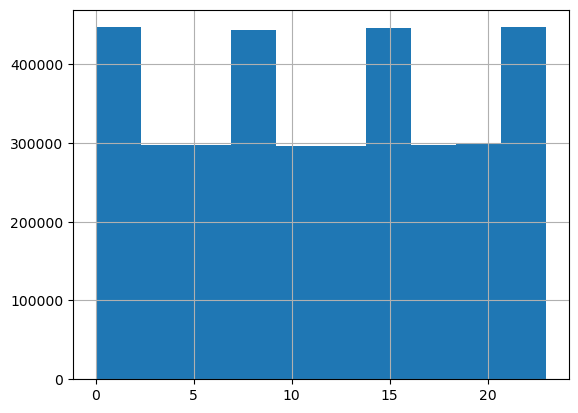

In [545]:
sensors.hour.astype("datetime64[ns, UTC]").dt.hour.hist()

<Axes: >

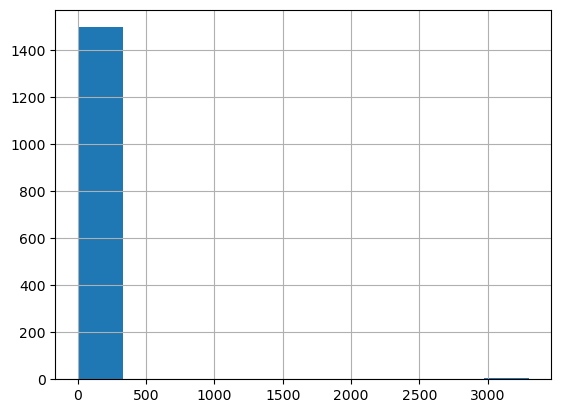

In [586]:
sensors.groupby("id").average.median().hist()

In [ ]:
### Although it's not all the IDS yet, testing my merge methods with loc
useful_columns = ["id", "lastUpdated" "firstUpdated", ]
locs

In [93]:
locs.sensorType.unique()

array([None], dtype=object)

In [233]:
len(sub_missing_ids)

32